In [1]:
import numpy as np
import pandas as pd

### Hypothesis Testing

Often, we likely don't care about the exact distribution of our data. The focus is more on whether it is greater or less than a specific value, or other set of data.

Imagine I now get a set of dice which may be loaded - ie. uneven.


We can set up a hypothesis about our data:

* The dice are loaded.

Our *Null hypothesis* is then:

* The dice are fair.

Now, we need to figure out how to test our hypothesis. In statistical terms, we have a *null hypothesis*, $H_0$, and an *alternate hypothesis*, $H_1$.

We can't simply roll a lot of dice and see if the results differ. Even fair dice are different due to random chance. We want to determine a way of figuring out if the samples appear to come from a different mechanism.


In traditional statistics, we can use a test to figure out how likely it is that the observed data happened by chance. This is called the *p-value* of our test.

Once we have inferred a *p-value*, we can decide whether to accept or reject the null hypothesis. Traditional statistics have chosen p < 0.05 as a cutoff for 'statistical significance'. If our test shows that our values are less than 1/20 to have occured due to chance, then we reject our null hypothesis that the samples are the same.

Note that *p-values* are currently considered a little controversal in several fields. The values of p=0.05 were arbitraily chosen by Ronald Fisher in the 1920s, and if statistics are misapplied, they can be inaccurate. There is also some debate in medical fields, where a p = 0.051 means we might deem a treatment worthless while a p = 0.049 means it might be best pratice. We will talk about alternative measures as we progress through the course.


### Categorical vs Continuous

In data, we often have two different types of variables, categorical and continuous.

Continuous variables are those that can take any value - height, weight, income, sales.

Categorical variables are those which fall into a category or class, hair color is often black, blonde, red or brown. Dice rolls are one of the values on the dice - we can't roll a 3.27, even if that is the expected outcome. Categorical outcomes can be ordered, like dice rolls, or unordered, like hair types. We can often pool or sum categorical outcomes to be continuous outcomes, like we did last time with the summing of the dice rolls.



Different variables require different tests. While we approximated the normal distribution using dice rolls, it is not strictly correct, we could never have had a sum of 55.3. The CLT allowed us to use the approximation.

### Chi Squared Test

We use a Chi Squared test aka $\chi^2$ test, when we have a number of observations, each of which have a categorical outcome.

A perfect example is our dice rolls - we roll dice, each of which falls into one of the outcomes of 1-6. If a dice is unbiased, we would expect each outcome to have 1/6 of the total rolls.

Lets make some data:

In [4]:
np.random.seed(12345)

#we are introduciing some bias by changing the probability of one roll to be 1.1 instead of 1 - higher probability of roll 6
bias = np.array([1,1,1,1,1,1.1])
bias = bias /sum(bias)
print(bias)

#p is probability (sums should add to 1) and should be the same length as the samples
unknownrolls = np.random.choice(range(1,7), replace = True, size = (2000), p = bias)
#notice that no p is specified, so default is all options are equally likely
evenrolls = np.random.choice(range(1,7), replace = True, size = (2000))


[0.16393443 0.16393443 0.16393443 0.16393443 0.16393443 0.18032787]


In [9]:
from collections import Counter
#collections is a module with a lot of useful stuff
#if you google 'how do i count occurances of items in a list in python' this is what it'll tell you to do.

tabbedbias = Counter(unknownrolls)
tabbedunbias = Counter(evenrolls)
print(tabbedbias)
print(tabbedunbias)


Counter({6: 362, 2: 336, 5: 335, 3: 334, 4: 318, 1: 315})
Counter({2: 354, 5: 350, 6: 334, 3: 331, 4: 325, 1: 306})


collections.Counter

To carry out the test, we need to calculate the below formula:

$$ \chi^2 = \sum_{k=1}^6\frac{(obs_k - exp_k)^2}{exp_k} $$

In English we take the observed number for each roll, minus the expected number, square it, and divide by the expected. We then sum the results of all numbers.

In [11]:
#We see that there are a lot more 6's in the unknown rolls - is this observation due to chance? i.e p > 0.05

expected = 1/6*2000 # probability of each roll is expected to be 1/6, and with 2000 rolls we expect to 2000*1/6 rolls

chisq = 0

for i in range(1,7):
    obs = tabbedbias[i]
    chisq += ((obs - expected)**2)/expected
    
print(chisq)

#unbiased
chisq = 0

for i in range(1,7):
    obs = tabbedunbias[i]
    chisq += ((obs - expected)**2)/expected
    
print(chisq)

4.21
4.582


### Exercise

1. Turn the above into a function, that takes the parameters `counts`, the counter dicts, `size` the size of the sample, and returns the chi square statistic
2. Document your function! Add a docstring, with examples.
3. Add assertions, to make sure you are taking in the expected data types.

In [13]:
#1

def get_chisq(counts, counter_dict, size, p_exp):
    
    chisq = 0
    
    for i in counts:
        obs = counter_dict[i]
        chisq += ((obs - size*p_exp)**2)/(size*p_exp)

    return chisq

get_chisq(range(1,7), tabbedbias, 2000, 1/6)

4.21

The Chi Square Value is a measure of bias in your dice. The Chi Square distribution is based on some math, showing how expect the values to fall based on random chance. We need a parameter, the 'degrees of freedom'. 

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Chi-square_distributionCDF-English.png" height = "300" width = "400">

Degrees of freedom is the number of values in our test that are free to vary. In our die example, we have 5 degrees of freedom. We have 6 dice outcomes, but given that we know how many dice we rolled, and the count of the numbers 1-5, we can infer the number of times we got 6.

To determine the p-value of Chi Squared test, we can either look up the values in a table, or use scipy:

In [25]:
from scipy import stats

#testing acorss uniform distibution (i.e equally likely so probability doesnt need to specified)

biased_chisq = get_chisq(range(1,7), tabbedbias, 2000, 1/6)

print([tabbedbias[i] for i in range(1,7)])
#print(stats.chi.cdf(biased_chisq,5))

print(stats.chisquare([tabbedbias[i] for i in range(1,7)]))
#we have automatically carried out degrees of freedom, and expected values.
print(stats.chisquare([tabbedunbias[i] for i in range(1,7)]))

[315, 336, 334, 318, 335, 362]
Power_divergenceResult(statistic=4.21, pvalue=0.5195942907852373)
Power_divergenceResult(statistic=4.582, pvalue=0.46898764252956293)


In our case, as our p-values are both greater than 0.05, we cannot reject the null hypothesis that the outcomes are not biased!

However, we know that one of the rolls was biased! This leads to an idea of statistical power. In this case, we actually got a more likely result from the unbiased dice than the biased dice. Some times a statistical test cannot detect subtle biases - remember, we have chance involved. We can increase the sample size, or if we have reason to suspect a certain subcategory is overrepresented, we can pool all our samples to be non-6 and 6:

In [27]:
#above we did chi-sq on all data, so the 4.21 we saw was for the whole set, not for the indiviual value.
#We know 6 is supposed to be weird, so lets look at 6 specifically by organizing the data as 6-data and non-6 data

nonsixes = 0
sixes = 0

for i in range(1,7):
    if i == 6:
        sixes += tabbedbias[i]
    else:
        nonsixes += tabbedbias[i]
print(sixes)
print(nonsixes)
stats.chisquare([sixes, nonsixes], f_exp = [1/6*2000,5/6*2000])

362
1638


Power_divergenceResult(statistic=2.958400000000006, pvalue=0.08543244158265792)

We still can't see a bias, although we are a little closer. We now have the risk that if someone has changed all the 1s to 2s, we will not be able to detect it.

In [28]:
np.random.seed(12345)

bias = np.array([1,1,1,1,1,1.2])
bias = bias /sum(bias)

unknownrolls = np.random.choice(range(1,7), replace = True, size = (2000), p = bias)
evenrolls = np.random.choice(range(1,7), replace = True, size = (2000))
tabbedbias = Counter(unknownrolls)
tabbedunbias = Counter(evenrolls)

In [29]:
print(stats.chisquare([tabbedbias[i] for i in range(1,7)]))
print(stats.chisquare([tabbedunbias[i] for i in range(1,7)]))

Power_divergenceResult(statistic=13.882000000000001, pvalue=0.016376598931130203)
Power_divergenceResult(statistic=4.582, pvalue=0.46898764252956293)


Now we can reject the Null Hypothesis - the die is not fair.

### Exercise

1. Play around with the bias and sample size of the biased die rolls. How do the two relate? How many samples do you need in order to reliably detect a bias of 1.05?

2. Alter the setup to change a d6 to a d4 (4 sided dice). How does the number of categories effect the test?

### Multiple Categories

We can carry out Chi Squared tests in multiple dimensions.

Let's investigate whether BrainStation has a difference in students across our courses at different campuses. The null hypothesis is that we have no difference in course preference in different places - while we might have more UX/UI than web design, or more Toronto than Vancouver students, we expect the courses to have simialr proportions across the different campuses.

NB. This is not real enrollment data!

|Course      | Vancouver| Toronto | Online|
|------------| -------- | ------- | ------- |
|Web Design  | 60       | 100     |  30 |
|UI/UX       | 70       | 140     |  30 |
|Data Science| 40       | 50      |  20 |

In [52]:
brainstation_data = {'Vancouver': [60,70,40],
                    'Toronto': [100,140,50],
                    'Online': [30,30,20]}


x = pd.DataFrame(brainstation_data, index=['Web Design','UI/UX','Data Science'])

#x = pd.DataFrame(brainstation_data)
#x.set_index('Course', inplace=True)
#x.info()
print(x)

stats.chi2_contingency(x)
#in the output, the array shows the expected values for each.

              Vancouver  Toronto  Online
Web Design           60      100      30
UI/UX                70      140      30
Data Science         40       50      20


(5.465891500140728,
 0.24274395293941214,
 4,
 array([[ 59.81481481, 102.03703704,  28.14814815],
        [ 75.55555556, 128.88888889,  35.55555556],
        [ 34.62962963,  59.07407407,  16.2962963 ]]))

In this case, the function has returned a tuple of multiple values.

### Exercise

1. Use the help to figure out what these values are.
2. How many more enrollments in Data Science in Toronto would we need to make p value less than 0.05?
3. Make the table into Data Science vs Non-Data Science and rerun the test. What is the p-value now?


### T-Tests

What if we have a continuous outcome? For example, we have a store in Downtown Toronto, and one in the suburbs. We want to know if the average spend per customer is different. 

We could try and bin every dollar value, and run a Chi Squared test, but this will very quickly become infeasible.

As we have previously learned, when we have a large number of samples, they should approximate the normal distribution (though they may not, which we will discuss next week).

To do this, we can use a T-test, also known as 'Student's T-test'. T-tests were developed by William Gosset, a statistician working on how to determine the quality of Stout produced at the Guiness Brewery in Ireland. He developed his method, but was forbidden to publish it by his bosses at Guiness, so he used the pen name 'Student', which has stuck to the test.

The motivation for this test isto determine whether the data could have come from the same normal distribution. We compare the mean of the two data sets, assume that the variances are equal, and determine whether a single process could have produced the data.

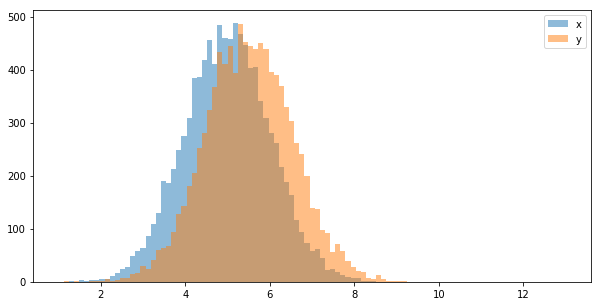

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.random.normal(loc = 5, scale = 1, size = 10000)
y = np.random.normal(loc = 5.5, scale = 1, size = 10000)

bins = np.linspace(1, 13, 100)
plt.figure(figsize=(10,5))
plt.hist(x, bins, alpha=0.5, label='x')
plt.hist(y, bins, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.show()

Compare the above normal curves - We know that they have come from different distributions, but the range overlaps.

How can we indicate that they are in fact different?

We have several different ways of testing difference using T-tests.

The first is a one sample T-test, which takes data, and determines if the mean is different from a given value.

In this case, we can test if the mean of the x sample is different than 5.5, the mean of the y set:

$$ t = \frac{\overline{x} - \mu}{\left(s\,\big/ \sqrt{n}\right)}$$

Where t is our t-statistic, µ is the value we are testing against, s is our standard deviation, and n is the size of the sample.

In [68]:
#loc = 5 is mean of 5, 
np.random.seed(555)
x = np.random.normal(loc = 5, scale = 1, size = 100)
t = (np.mean(x) - 5.5)/(np.std(x, ddof = 1)/np.sqrt(len(x)))
#in stats, we have the sample std dev, and the population stdev. We want the sample std when we have a sample
#like in this case
t
#the t-statistic we again look up in a table, to find the p-value

-5.236039215910216

In [69]:
stats.ttest_1samp(x, 5.5) # this is ttest_1samp --its a ONE not an i or l

Ttest_1sampResult(statistic=-5.236039215910216, pvalue=9.231852200655178e-07)

We can also carry out a test where we compare two samples:

$$ t = \frac{\overline{X}_1 - \overline{X}_2}{s_p\sqrt{\frac{2}{n}}}$$

Where the $\overline{X}_1$ and $\overline{X}_2$ are the sample means, and $s_p$ is the pooled standard deviation of the samples:

In [73]:
#100 consumer spends in downtown Toronto
downtown = np.random.normal(loc = 5, scale = 1, size = 100)
#100 spends in the suburbs
suburbs = np.random.normal(loc = 5.5, scale = 1, size = 100)

t = (np.mean(downtown) - np.mean(suburbs))/(np.sqrt((np.var(downtown, ddof = 1) + np.var(suburbs, ddof = 1))/2)*np.sqrt((2/len(downtown))))
print(t)

-4.339524064351627


In [76]:
#Null is mean1 = mean 2, alt hypoth is means1 != means2
stats.ttest_ind(downtown,suburbs)

Ttest_indResult(statistic=-4.339524064351627, pvalue=2.2750711288321723e-05)

How do we report this result? We know that we have a higher spend in the suburbs:

In [77]:
np.mean(suburbs) - np.mean(downtown)

0.6300240126339833

We also know that the P Value is significant. Standard Practice is to report it as:

In [78]:
print(f'''
Suburban spends have an average of {np.mean(y):.4f}, as compared to the average for downtown of {np.mean(x):.4f}.
Carrying out a two sample T-test, we can reject the Null Hypothesis with a P-Value of {stats.ttest_ind(x, y)[1]:.4f}.
Concluding that there is a difference in spending between the Suburban and Downtown Stores''')


Suburban spends have an average of 5.5111, as compared to the average for downtown of 4.9905.
Carrying out a two sample T-test, we can reject the Null Hypothesis with a P-Value of 0.0000.
Concluding that there is a difference in spending between the Suburban and Downtown Stores


The third kind of T-test is a 'paired T-test', or a 'repeated measures' T-test. In this case we can add a level of 'structure' to our test.

We use a paired T-test when we have measured each 'subject' in both conditions of our T-test. For example, while we have shown that customers have a different spending in Downtown versus Suburban stores, it might be due to different customers visiting the stores, rather than a difference between spending once they are in the door.

To fix this, let's imagine we have spending data for the same 100 customers at both stores. In this case, we have 'repeated measures' of each customer at both stores. Now we can cancel out any difference in customers, as each customer has visited each store. Customers can be modeled as having some bias - each customer spends more or less than the average at each store.

This time, we derive our T-statistic from the differences between paired samples:

$$ t = \frac{\overline{X}_D - µ_0}{\frac{s_D}{\sqrt{n}}} $$

Where $X_D$ is the difference between paired samples, $µ_0$ is our mean difference that we want to compare to (0 in this case), $s_D$ is sample standard deviation, and n is the number of samples.

Let's try to simulate some data, and carry out a non-paired test:

In [79]:
np.random.seed(9876)
#x, downtown. Mean = 5, sd = 1
downtown = np.random.normal(loc = 5, scale = 1, size = 100)
#y, suburban, Mean = 5.3, sd = 1
suburbs = np.random.normal(loc = 5.3, scale = 1, size = 100)

#Now, each customer has some of their own 'bias', where they are spending
#less or more than average by a random number

bias = np.random.normal(loc = 1, scale = 1, size = 100)
downtown = downtown + bias
suburbs = suburbs + bias

#2-sample test
stats.ttest_ind(downtown, suburbs)

Ttest_indResult(statistic=-1.2601313195430197, pvalue=0.2091051342275966)

Without knowing that the bias is the same for each customer, we can no longer tell if the stores have a different effect, as the added variability of customers swamps the difference between the stores.

However, a repeated measures T-test clears it up:

In [80]:
#notice that we are taking the mean of the difference (element-wise) between spending in downtown and suburbs
t = (np.mean(downtown - suburbs) - 0)/(np.std(downtown - suburbs, ddof = 1)/np.sqrt(len(downtown)))
t

-2.0657002037227885

In [81]:
#paired t test
stats.ttest_rel(downtown,suburbs)

Ttest_relResult(statistic=-2.0657002037227885, pvalue=0.04146903988892927)

In [91]:
#2-sample t-test: comparing the difference of the means
#paird t-test: you're comparing the mean of the difference

Using the paired T-test, we have sucessfully been able to reject the null hypothesis, and can conclude that there is some difference between the two samples.

### One Tailed Tests Versus Two Tailed Tests

So far, we have only carred out two tailed tests. When we have been carrying out the tests, we have been testing whether there was a diffence between the means, rather than whether one was higher than the other.

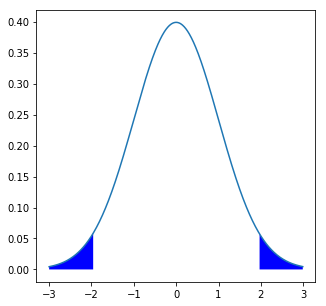

In [82]:
#if we wanted to know if mean 1 was larger than mean 2, then use a one-tailed test

fig = plt.figure(figsize=(5.0, 5.0))

xvals = np.arange(-3, 3, 0.01)
yvals = stats.norm.pdf(xvals, 0, 1)
axes = fig.add_subplot(1, 1,1)
axes.plot(xvals, yvals);
axes.fill_between(xvals,0,yvals, xvals > 1.96, facecolor = 'blue')
axes.fill_between(xvals,0,yvals, xvals < -1.96, facecolor = 'blue');

So far, we have been testing whether our value falls into either of these two tails. In the one sample T-test, if our mean falls into the tails, then we were significant. The two sample T-test, tested the difference in value of the two means, and the paired T-test tested the differences between paired samples. This value is about 1.96 standard deviations from the mean, and contains a total of 5% of total outcomes.

If we have a strong reason to suspect that one is larger than the other we could do a one tailed test. In this case our null hypothesis:

$H_0$: Mean of Group A is greater than or equal to Group B

But our alternatie hypothesis is:

$H_1$: Mean of Group A is less than mean of Group B.

In general, this will halve our p-values! But, it needs to be justified, and should be used with care.

We simply divide the p-value by two when reporting it, some statistical software allows one vs two tails, scipy advises the user to /2. 

### Exercises

We are investigating the time spent on our website by a group of visitors. We would like to know if the amount of time spent in seconds is greater than our competitor, who has published the mean time spent as 120 seconds.

We have data for 100 of our website visitors:


In [83]:
time_spent = np.array([139.42870327, 106.18048611, 158.65413937, 123.74696208,
       115.58822533, 147.74325881, 147.19176827, 117.26952991,
       130.31392744,  85.14630092, 153.00071449, 149.83892045,
       149.06648256,  89.5749036 , 123.31845268, 130.04236729,
       138.10906823, 135.78183882, 156.42316384,  99.06188894,
       125.94707351, 116.88061312, 133.86842753, 141.06877822,
       156.36303108, 120.61389431, 143.5110817 ,  93.65945547,
       126.3378292 , 151.17938375, 122.04319544, 136.74875307,
       150.95157146, 150.91876511, 147.27434583, 127.5581685 ,
       132.49425908, 123.54410389, 146.83349426, 177.81921031,
       131.52399176, 118.67108139, 130.72283873,  88.50044799,
       134.95584399, 112.05686431, 127.26410333, 130.36578383,
       145.10827965, 134.30537162, 146.8201759 , 101.08379846,
       101.96053437, 127.981636  , 119.03515102, 127.10760983,
       137.08040664, 129.28973949, 141.31476612, 160.91317609,
       110.51527332, 128.59310246, 136.1593771 , 125.83002474,
       150.67601465,  81.99092732, 170.61207242, 107.14737422,
       134.23766774, 144.09441249, 114.29129576, 139.24119474,
       144.08456451, 140.47015936, 111.47491373, 170.15685902,
       134.53925084, 106.94681781, 142.63958892, 130.79025373,
       139.2878465 ,  58.72966679, 156.42211231, 133.05261104,
       133.29059086, 121.39808618, 145.34737472, 149.69839684,
       135.41671698, 157.83972387, 131.59684626, 122.00070839,
       109.44298883, 118.30563577, 146.33187853, 128.36105896,
       123.10467971, 140.56576291, 108.62022433, 119.76237382])

1. Plot the time spent on the website as a histogram.

2. Choose an appropriate t-test to carry out to determine if time spent on our website is different from our competitors.

3. What is the Null hypothesis? Do we reject it? NEVER ACCEPT IT

We then decide to redesign our site, to try and increase time spent. We have some new data, from 100 different users:


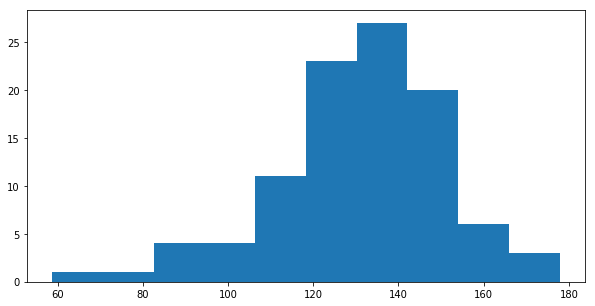

Ttest_1sampResult(statistic=5.3473747137756025, pvalue=5.744718445636544e-07)

Carrying out a one sample T-test, we can reject the Null Hypothesis that the means of site visit duration between both sites are not different with a P-Value of 0.0000.
Therefore, we conclude that there is a difference in site visit duration between both sites


In [102]:
#1
plt.figure(figsize=(10,5))
plt.hist(time_spent)
plt.show()

#2 since we are comapring the mean of our data to the mean of 120, we will do a one-sample t-test
print(stats.ttest_1samp(time_spent, 120))

#3
print(f'''
Carrying out a one sample T-test, we can reject the Null Hypothesis that the means of site visit duration between both sites are not different with a P-Value of {stats.ttest_1samp(time_spent, 120)[1]:.4f}.
Therefore, we conclude that there is a difference in site visit duration between both sites''')

In [103]:
time_spent2 = np.array([142.82410719, 148.33067393, 147.07183518, 142.7059137 ,
       146.68576225, 164.26963025, 121.37789433, 127.63964667,
       161.4914871 , 111.3778345 , 154.50951009, 102.78569352,
       127.98469794, 151.98327612, 132.92134268, 133.35649177,
       150.61312009, 100.63002019, 137.94143271, 144.89688419,
       132.03135891, 124.64586704, 123.34232007, 145.72515209,
       102.93974452, 144.87421198, 127.41351993, 131.01967414,
       150.88206575, 150.57259347, 141.7911199 , 140.02453259,
       153.32254467, 174.87068935, 149.79265526, 117.75942336,
        95.29468716, 175.60493535, 102.29302251, 161.2076741 ,
       152.94870839, 129.40378432, 151.05124448, 119.99307457,
       160.536249  , 126.51327795, 151.01815462, 156.68376141,
       134.56543183, 184.31537258, 146.92285852, 152.93189733,
       127.5195822 , 135.86608567, 164.15594516, 120.90332552,
        94.52759502, 130.32995119, 119.26561295, 143.68395862,
       147.7356765 , 122.12339264, 130.59592236, 118.67602277,
       119.806634  , 141.51970973, 149.57551653, 140.72988698,
       156.0495669 , 156.76275165, 135.54783372, 125.98794153,
       118.23694772, 112.21856875, 139.79366548, 132.53962036,
       179.47383777, 139.44546869, 108.8113652 , 165.45971906,
        94.04289925, 110.04934973, 144.27129114, 136.70495776,
       162.44790157, 108.00866782, 113.08952517, 125.16274054,
       128.70990313, 108.48410533, 141.18789575, 125.14227992,
       107.53767173, 119.06838769, 159.0870314 , 128.36900969,
       133.77726184, 154.78314988, 142.76753695, 115.96922125])

As we spent a lot of money, time and upgraded to best web practices, we decide to run a one tailed T-test.


1. Run a test to determine if we accept that our websites increased visit time.

2. Do we accept it? Do you agree with running a one tailed test? How does the result differ in a two tailed test?

3. The data here is actually from the same 100 users, in the same order, carry out a paired T-test.

4. Do we have more evidence that our redesign changed user behaviour?

In [128]:
#1 2 sample T-test

ttest, pval = stats.ttest_ind(time_spent2,time_spent)
print(stats.ttest_ind(time_spent2,time_spent))
#since the p-value > 0.05, we cannot accept that the website time has increased

#2 sample T test
print(ttest)
print(pval/2)
#The one tailed vs two-tailed differ by the p-value whereas the one-tailed pvalue is half of the two-tailed.


#3 paired T-test
ttest2, pval2 = stats.ttest_rel(time_spent2, time_spent)
print(stats.ttest_rel(time_spent2, time_spent))

#4 The p-value is closer to the threshold of 0.05, however p-value is still greater than 0.05 so we cannot reject null that the website has increased visit time


Ttest_indResult(statistic=1.8867945474784085, pvalue=0.06065137350106095)
1.8867945474784085
0.030325686750530476
Ttest_relResult(statistic=1.9701484826875784, pvalue=0.05161487524105376)
